In [1]:
import pandas as pd
import ast
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd

load_dotenv()
API_KEY = os.getenv('API_KEY')

df = pd.read_csv('27-oct-extracted.csv')
kw = df['keywords'].to_list()
kw = [ast.literal_eval(items) for items in kw]
kw = [item for sublist in kw for item in sublist]
kw_set = set(kw)

In [2]:
count_kw = {}

for i, item in enumerate(kw):
    if item in count_kw:
        count_kw[item] += 1
    else:
        count_kw[item] = 1
        
count_kw

{'Theory of Mind': 2,
 'Human-AI Interaction': 28,
 'Social Intelligence': 1,
 'User Experience': 41,
 'Design Guidelines': 8,
 'User Values': 1,
 'Prayer Experiences': 1,
 'Clinical Decision-Making': 2,
 'Patient-Centered Care': 1,
 'AI Interaction Models': 1,
 'Explainable AI': 31,
 'Trust Formation': 1,
 'Human-AI Interactions': 2,
 'User Burden': 1,
 'Sexual Assault Reporting': 1,
 'Algorithmic Evaluation Resistance': 1,
 'Appropriate Trust': 2,
 'Research Opportunities': 2,
 'Inclusivity': 2,
 'Problem-solving diversity': 1,
 'Demographic diversity': 1,
 'Interaction Paradigms': 1,
 'System Design': 1,
 'Music Application': 1,
 'User Needs': 2,
 'Human-AI Collaboration': 34,
 'Placebo Effect': 2,
 'User Studies': 1,
 'Artificial Intelligence': 3,
 'Mind Perception': 1,
 'Design Solutions': 1,
 'AI Systems Understanding': 1,
 'Game-Based Learning': 2,
 'User Mental Models': 1,
 'User Interface Design': 4,
 'Ecological Thinking': 1,
 'Sustainable Future': 1,
 'Decision Making': 9,
 

In [3]:
embedding = {}

openai_key = ""
from openai import OpenAI
client = OpenAI(api_key=API_KEY)

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding


In [4]:
import concurrent.futures
from typing import Set, Dict, Any

def process_item(item: str) -> tuple[str, Any]:
    print()
    embedding = get_embedding(item)
    return (item, embedding)

def get_concurrent_embeddings(kw_set: Set[str], max_workers: int = 5) -> Dict[str, Any]:
    embeddings = {}
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_item = {
            executor.submit(process_item, item): item 
            for item in kw_set
        }
        
        for future in concurrent.futures.as_completed(future_to_item):
            try:
                item, embedding = future.result()
                embeddings[item] = embedding
            except Exception as e:
                print(f"Error processing {future_to_item[future]}: {str(e)}")
    
    return embeddings

embedding = get_concurrent_embeddings(kw_set)

Processing item: Stakeholder Influence
Processing item: Self-Reflection
Processing item: Security Operations Centres
Processing item: User Interface
Processing item: Virtual Environment
Processing item: User Evaluation
Processing item: Teaming Perception
Processing item: Radiology
Processing item: Programming Interactions
Processing item: Physical Intelligibility
Processing item: Smart Home
Processing item: Design Education
Processing item: User perception
Processing item: Concept Induction
Processing item: System Design
Processing item: Audience Engagement
Processing item: Medical Diagnosis
Processing item: Text Recommendation
Processing item: Audio-Visual Learning
Processing item: Command Customization
Processing item: Social and Ethical Risks
Processing item: Polyp Detection
Processing item: AI Writing Tools
Processing item: Educational Technology
Processing item: Design Framework
Processing item: Research themes
Processing item: Complexity Methods
Processing item: Data Analytics
Pr

Optimal number of clusters: 7


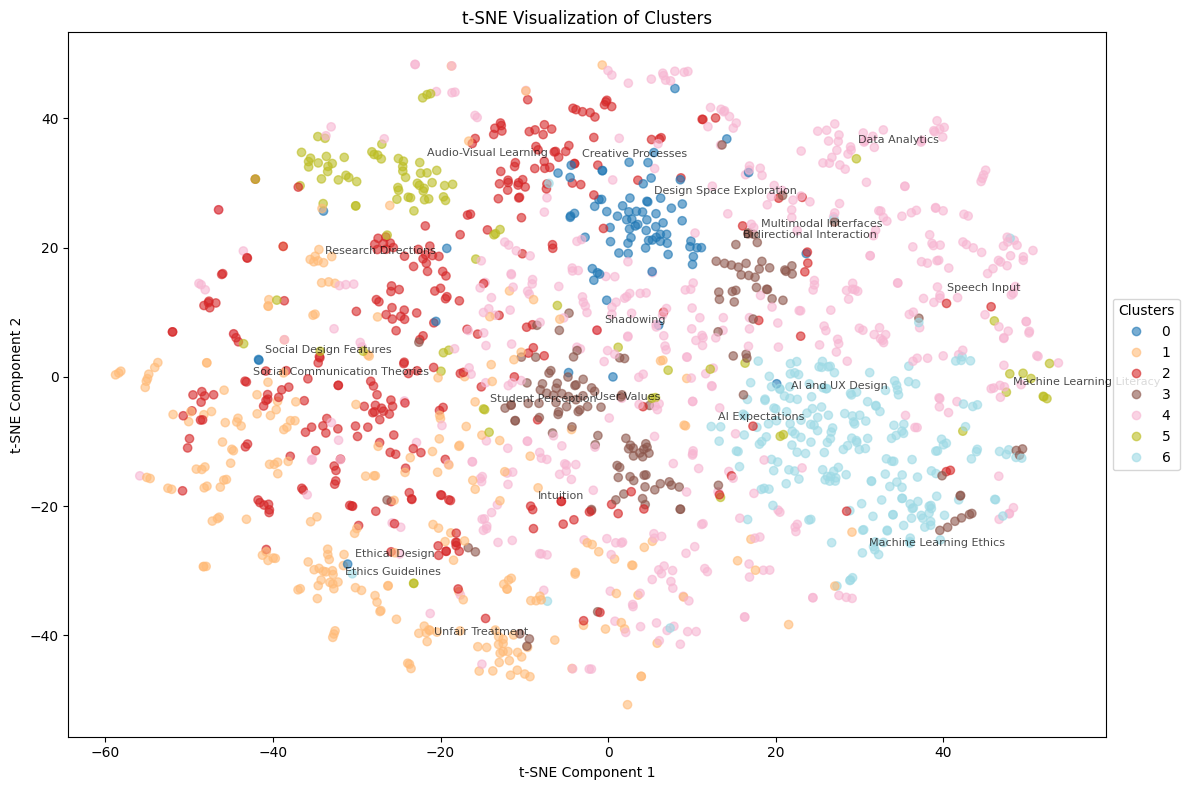


Cluster Statistics:
--------------------------------------------------

Cluster 0:
Number of statements: 82
Sample statements:
- Design Education...
- System Design...
- Design Framework...

Cluster 1:
Number of statements: 251
Sample statements:
- Stakeholder Influence...
- Social and Ethical Risks...
- Teenagers...

Cluster 2:
Number of statements: 295
Sample statements:
- Virtual Environment...
- Teaming Perception...
- Self-Reflection...

Cluster 3:
Number of statements: 143
Sample statements:
- User Interface...
- User Evaluation...
- Programming Interactions...

Cluster 4:
Number of statements: 471
Sample statements:
- Radiology...
- Security Operations Centres...
- Physical Intelligibility...

Cluster 5:
Number of statements: 94
Sample statements:
- Audio-Visual Learning...
- Educational Technology...
- Task Learning...

Cluster 6:
Number of statements: 219
Sample statements:
- AI Writing Tools...
- Human-Centred AI...
- Creative AI Tools...
Optimal number of clusters: 7
Cluste

[nltk_data] Downloading package punkt to /Users/chayapatr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chayapatr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chayapatr/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from kneed import KneeLocator
from typing import Dict, List, Tuple
import seaborn as sns

def determine_optimal_k(embeddings: np.ndarray, max_k: int = 20) -> int:
    """
    Determine optimal number of clusters using elbow method
    
    Args:
        embeddings: numpy array of embeddings
        max_k: maximum number of clusters to try
    
    Returns:
        optimal number of clusters
    """
    inertias = []
    k_values = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        inertias.append(kmeans.inertia_)
    
    # Use knee locator to find the optimal k
    kneedle = KneeLocator(
        k_values, 
        inertias, 
        S=1.0, 
        curve="convex", 
        direction="decreasing"
    )
    
    # If no clear elbow is found, use square root of n/2
    if kneedle.elbow is None:
        optimal_k = int(np.sqrt(len(embeddings) / 2))
    else:
        optimal_k = kneedle.elbow
        
    return optimal_k

def perform_clustering(embedding_dict: Dict[str, List[float]]) -> Tuple[np.ndarray, np.ndarray, list]:
    """
    Perform K-means clustering on embeddings
    
    Args:
        embedding_dict: dictionary mapping statements to their embeddings
    
    Returns:
        tuple of (reduced embeddings, cluster labels, statements)
    """
    # Convert dictionary to arrays
    statements = list(embedding_dict.keys())
    embeddings = np.array([embedding_dict[stmt] for stmt in statements])
    
    # Determine optimal number of clusters
    optimal_k = determine_optimal_k(embeddings)
    print(f"Optimal number of clusters: {optimal_k}")
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    
    return reduced_embeddings, cluster_labels, statements

def visualize_clusters(reduced_embeddings: np.ndarray, 
                      cluster_labels: np.ndarray, 
                      statements: list,
                      figsize: tuple = (12, 8)) -> None:
    """
    Visualize clusters using scatter plot
    
    Args:
        reduced_embeddings: t-SNE reduced embeddings
        cluster_labels: cluster assignments
        statements: original statements
        figsize: figure size
    """
    plt.figure(figsize=figsize)
    
    # Create scatter plot
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=cluster_labels,
        cmap='tab20',
        alpha=0.6
    )
    
    # Add legend
    legend1 = plt.legend(*scatter.legend_elements(),
                        title="Clusters",
                        loc="center left",
                        bbox_to_anchor=(1, 0.5))
    # plt.addartist(legend1)
    
    # Add labels and title
    plt.title('t-SNE Visualization of Clusters')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    
    # Add annotations for a few points from each cluster
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        # Get indices for current cluster
        cluster_idx = np.where(cluster_labels == cluster)[0]
        # Sample up to 3 points from cluster
        sample_idx = np.random.choice(cluster_idx, 
                                    size=min(3, len(cluster_idx)), 
                                    replace=False)
        
        for idx in sample_idx:
            plt.annotate(statements[idx][:50] + '...' if len(statements[idx]) > 50 else statements[idx],
                        (reduced_embeddings[idx, 0], reduced_embeddings[idx, 1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Example usage
# Replace this with your actual embedding dictionary
example_dict = {
    "statement1": [0.1, 0.2, 0.3],
    "statement2": [0.2, 0.3, 0.4],
    # ... more statements and embeddings
}

# Perform clustering and visualization
reduced_emb, labels, stmts = perform_clustering(embedding)
visualize_clusters(reduced_emb, labels, stmts)

# Additional Analysis: Cluster Statistics
def analyze_clusters(statements: list, cluster_labels: np.ndarray) -> None:
    """
    Print statistics about the clusters
    """
    unique_clusters = np.unique(cluster_labels)
    print("\nCluster Statistics:")
    print("-" * 50)
    
    for cluster in unique_clusters:
        cluster_statements = [stmt for i, stmt in enumerate(statements) 
                            if cluster_labels[i] == cluster]
        print(f"\nCluster {cluster}:")
        print(f"Number of statements: {len(cluster_statements)}")
        print("Sample statements:")
        for stmt in cluster_statements[:3]:  # Show first 3 statements
            print(f"- {stmt[:100]}...")
            
# Run cluster analysis
analyze_clusters(stmts, labels)

# Save results to CSV
def analyze_cluster_content(statements: list, 
                        embeddings: np.ndarray,
                        cluster_labels: np.ndarray,
                        kmeans_model: KMeans,
                        n_keywords: int = 10,
                        n_samples: int = 5) -> Dict[int, dict]:
    """
    Analyze and explain the content of each cluster
    
    Args:
        statements: list of original statements
        embeddings: original embeddings array
        cluster_labels: cluster assignments
        kmeans_model: fitted KMeans model
        n_keywords: number of keywords to extract per cluster
        n_samples: number of representative samples to show
        
    Returns:
        Dictionary containing analysis for each cluster
    """
    from sklearn.feature_extraction.text import TfidfVectorizer
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('punkt_tab')
    
    # Initialize stop words
    stop_words = set(stopwords.words('english'))
    
    cluster_analysis = {}
    unique_clusters = np.unique(cluster_labels)
    
    for cluster in unique_clusters:
        # Get cluster-specific data
        cluster_mask = cluster_labels == cluster
        cluster_statements = np.array(statements)[cluster_mask]
        cluster_embeddings = embeddings[cluster_mask]
        
        # Calculate distances to cluster centroid
        centroid = kmeans_model.cluster_centers_[cluster]
        distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
        
        # Get representative samples (closest to centroid)
        closest_indices = np.argsort(distances)[:n_samples]
        representative_samples = cluster_statements[closest_indices]
        
        # Extract keywords using TF-IDF
        vectorizer = TfidfVectorizer(
            stop_words='english',
            max_features=n_keywords,
            ngram_range=(1, 2)
        )
        
        # Combine statements for better keyword extraction
        combined_text = ' '.join(cluster_statements)
        
        # Basic text preprocessing
        tokens = word_tokenize(combined_text.lower())
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        processed_text = ' '.join(tokens)
        
        # Get TF-IDF scores
        try:
            tfidf_matrix = vectorizer.fit_transform([processed_text])
            feature_names = vectorizer.get_feature_names_out()
            scores = tfidf_matrix.toarray()[0]
            keywords = [feature_names[i] for i in scores.argsort()[-n_keywords:][::-1]]
        except ValueError:
            keywords = []
        
        # Calculate basic statistics
        avg_length = np.mean([len(stmt.split()) for stmt in cluster_statements])
        
        # Store analysis results
        cluster_analysis[cluster] = {
            'size': len(cluster_statements),
            'keywords': keywords,
            'representative_samples': representative_samples.tolist(),
            'avg_statement_length': avg_length,
            'coherence_score': -np.mean(distances)  # Higher score = more coherent
        }
    
    return cluster_analysis

def explain_clusters(cluster_analysis: Dict[int, dict], 
                    min_similarity_threshold: float = 0.5) -> None:
    """
    Print human-readable explanations of cluster characteristics
    
    Args:
        cluster_analysis: output from analyze_cluster_content
        min_similarity_threshold: threshold for considering clusters similar
    """
    print("Cluster Analysis Report")
    print("=" * 50)
    
    # Sort clusters by size
    sorted_clusters = sorted(cluster_analysis.items(), 
                           key=lambda x: x[1]['size'], 
                           reverse=True)
    
    for cluster_id, analysis in sorted_clusters:
        print(f"\nCluster {cluster_id} Analysis")
        print("-" * 30)
        
        # Basic statistics
        print(f"Size: {analysis['size']} statements")
        print(f"Average statement length: {analysis['avg_statement_length']:.1f} words")
        print(f"Coherence score: {analysis['coherence_score']:.3f}")
        
        # Keywords
        print("\nKey themes and phrases:")
        for keyword in analysis['keywords']:
            print(f"  • {keyword}")
        
        # Representative samples
        print("\nRepresentative examples:")
        for i, sample in enumerate(analysis['representative_samples'], 1):
            if len(sample) > 100:
                sample = sample[:100] + "..."
            print(f"{i}. {sample}")
        
        print("\nInterpretation:")
        # Generate interpretation based on keywords and samples
        if analysis['coherence_score'] > min_similarity_threshold:
            print("This is a highly coherent cluster with clear common themes.")
        else:
            print("This cluster shows more diversity in its content.")
        
        # Additional insights based on statistics
        if analysis['avg_statement_length'] > 50:
            print("Statements in this cluster tend to be longer and more detailed.")
        elif analysis['avg_statement_length'] < 20:
            print("Statements in this cluster are typically brief and concise.")
        
        print("-" * 50)

def save_results(statements: list, 
                cluster_labels: np.ndarray, 
                reduced_embeddings: np.ndarray,
                cluster_analysis: Dict[int, dict],
                filename: str = 'clustering_results.csv') -> None:
    """
    Save clustering results to CSV file
    """
    results_df = pd.DataFrame({
        'statement': statements,
        'cluster': cluster_labels,
        'tsne_1': reduced_embeddings[:, 0],
        'tsne_2': reduced_embeddings[:, 1]
    })
    
    # Add cluster analysis information
    results_df['cluster_size'] = results_df['cluster'].map(
        lambda x: cluster_analysis[x]['size'])
    results_df['cluster_keywords'] = results_df['cluster'].map(
        lambda x: ', '.join(cluster_analysis[x]['keywords']))
    results_df['cluster_coherence'] = results_df['cluster'].map(
        lambda x: cluster_analysis[x]['coherence_score'])
    
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

# Perform clustering and analysis
reduced_emb, labels, stmts = perform_clustering(embedding)
embeddings = np.array([embedding[stmt] for stmt in stmts])

# Get the KMeans model
optimal_k = determine_optimal_k(embeddings)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(embeddings)

# Analyze clusters
cluster_analysis = analyze_cluster_content(
    statements=stmts,
    embeddings=embeddings,
    cluster_labels=labels,
    kmeans_model=kmeans
)

# Print cluster explanations
explain_clusters(cluster_analysis)

# Save the results with cluster analysis
save_results(stmts, labels, reduced_emb, cluster_analysis)